# Designing the spectral basis

In [3]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from scipy import special as specfun
from pg_utils.pg_model import core

---
## Two-sided Jacobi polynomial

In [18]:
class Jacobi_two_side:
    
    def __init__(self, k1, k2, alpha, beta):
        self.k1, self.k2 = k1, k2
        self.alpha, self.beta = alpha, beta
        
    def __call__(self, n_array, s_array):
        H = np.sqrt(1 - s_array**2)
        return H**self.k1*s_array**self.k2*specfun.eval_jacobi(n_array, self.alpha, self.beta, 2*s_array**2 - 1)

Flavours of two-sided Jacobi polynomials

In [88]:
k1 = 3
k2 = 3

# Orthogonal w.r.t. volume weight
J_v = Jacobi_two_side(k1, k2, k1 + 1/2, k2)

# Orthogonal w.r.t. surface weight
J_s = Jacobi_two_side(k1, k2, k1, k2)

# Orthogonal w.r.t. unit weight in s
J_1 = Jacobi_two_side(k1, k2, k1, k2 - 1/2)

# Orthogonal w.r.t. Worland weight
J_w = Jacobi_two_side(k1, k2, k1 - 1/2, k2 - 1/2)

Plotting

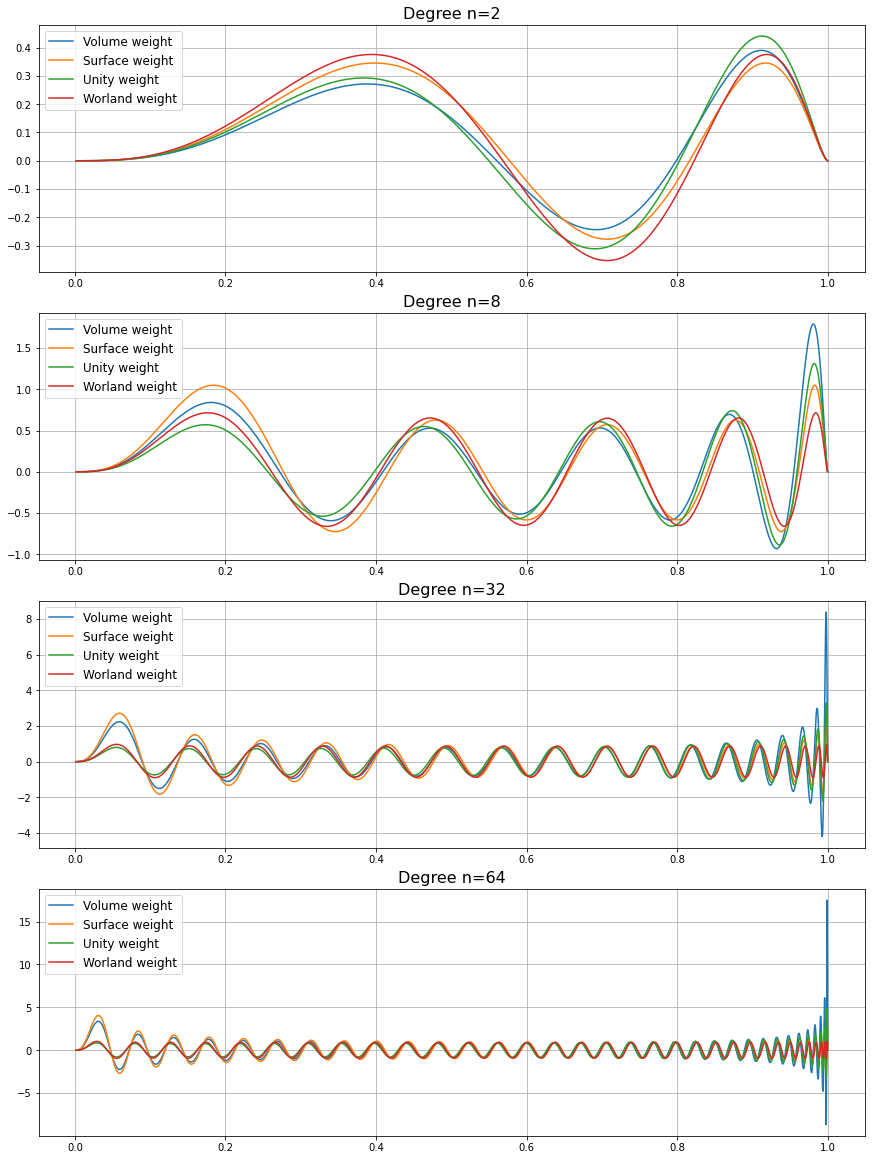

In [89]:
n_list = np.array([
    [2,],
    [8,],
    [32,],
    [64],
])
Ns = 500
xi_grid, wt = specfun.roots_chebyt(Ns)
s_grid = np.sqrt((1 + xi_grid)/2)
basis_list = [J_v, J_s, J_1, J_w]
basis_names = ['Volume weight', 'Surface weight', 'Unity weight', 'Worland weight']

save_name = './out/imgs/Jacobi_2sided_k1_1_k2_5'
save_name = None

fig, axes = plt.subplots(nrows=n_list.shape[0], ncols=n_list.shape[1], figsize=(12*n_list.shape[1], 4*n_list.shape[0]), layout='constrained')
axes = np.atleast_2d(axes).T

for i_r in range(n_list.shape[0]):
    for i_c in range(n_list.shape[1]):
        ax = axes[i_r, i_c]
        n = n_list[i_r, i_c]
        for basis_name, basis_tmp in zip(basis_names, basis_list):
            coeff = np.sqrt(n*np.pi)*np.sqrt(2)**(basis_tmp.k1 + basis_tmp.k2 - basis_tmp.alpha - basis_tmp.beta - 1)
            ax.plot(s_grid, coeff*basis_tmp(n, s_grid), '-', label=basis_name)
        # ax.set_ylim([-2, 2])
        ax.grid(which='both')
        ax.legend(fontsize=12)
        ax.set_title(f'Degree n={n}', fontsize=16)

if save_name is not None:
    plt.savefig(save_name + '.png', dpi=120, bbox_inches='tight')
    plt.savefig(save_name + '.pdf', bbox_inches='tight')
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=n_list.shape[0], ncols=n_list.shape[1], figsize=(10*n_list.shape[1], 4*n_list.shape[0]), layout='constrained')
axes = np.atleast_2d(axes)

for i_r in range(n_list.shape[0]):
    for i_c in range(n_list.shape[1]):
        ax = axes[i_r, i_c]
        n = n_list[i_r, i_c]
        for basis_name, basis_tmp in zip(basis_names, basis_list):
            ax.plot(xi_grid, basis_tmp(n, s_grid), label=basis_name)
        ax.grid(which='both')
        ax.legend(fontsize=12)
        ax.set_title(f'Degree n={n}', fontsize=14)

plt.show()